In [2]:
import database
import pandas as pd

# Load the dataframe
df = database.main()

# Display the first few rows of the dataframe
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501


In [3]:
# Get the summary statistics of the dataframe
df.describe()

C:\Users\karim.HOME\AppData\Local\Temp\ipykernel_11764\2546960742.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp
count,1480,1480,1480,1480,1480,1480,1470,148,1009,465,162,1009
unique,278,294,402,17,101,327,14,1,49,1,38,285
top,Data Analyst,AXA Group,Data Analyst\n\nParis ou Rennes\n\nUp to 60k€\...,"Paris, France",via LinkedIn,"{Full-time,Full-time}",Full-time,Work from home,2 days ago,No degree mentioned,€8K–€18K a year,2024-02-14 17:42:02.658252
freq,188,24,12,1226,174,171,1090,148,118,465,14,17
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-15 10:54:19.019501
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-22 03:38:34.439187


In [4]:
# Check the data types of each column
df.dtypes

title                          object
company                        object
description                    object
location                       object
via                            object
extensions                     object
employment_type                object
work_mode                      object
posting_date                   object
degree_requirement             object
salary                         object
posted_at_timestamp    datetime64[ns]
dtype: object

In [5]:
# Check for missing values in the dataframe
df.isnull().sum()

title                     0
company                   0
description               0
location                  0
via                       0
extensions                0
employment_type          10
work_mode              1332
posting_date            471
degree_requirement     1015
salary                 1318
posted_at_timestamp     471
dtype: int64

In [6]:
# Calculate duplicates
duplicates = df.duplicated().sum()
duplicates


469

In [7]:
employment_types = df['employment_type'].unique()
employment_types


array(['Full-time and Internship', 'Full-time', 'Internship',
       'Contractor', 'Full-time and Temp work',
       'Full-time, Part-time, and Contractor',
       'Full-time, Temp work, and Internship', 'Part-time and Internship',
       'Temp work and Internship', 'Full-time and Part-time',
       'Full-time and Contractor', None, 'Contractor and Temp work',
       'Part-time', 'Part-time and Contractor'], dtype=object)

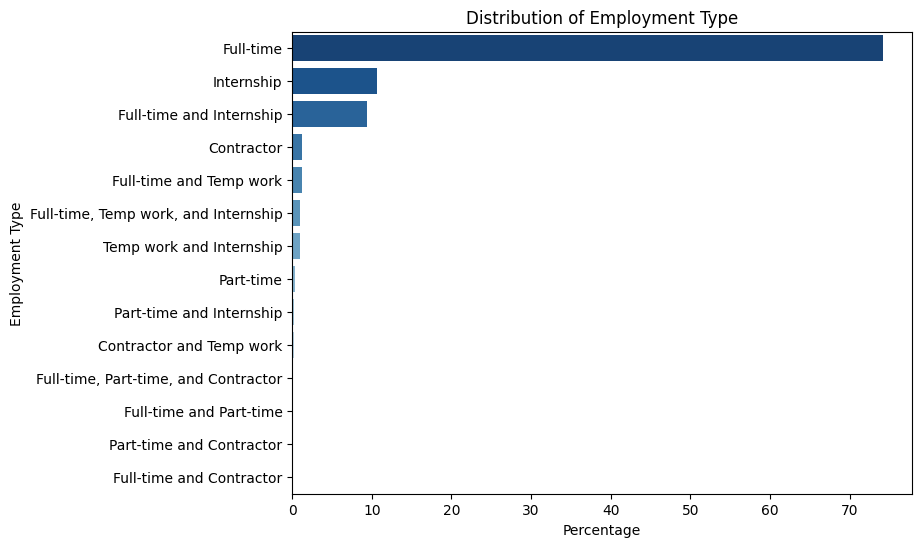

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage distribution of employment_type
employment_type_percentage = df['employment_type'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=employment_type_percentage.values, y=employment_type_percentage.index, palette="Blues_r")
plt.xlabel('Percentage')
plt.ylabel('Employment Type')
plt.title('Distribution of Employment Type')
plt.show()


In [9]:
degree_required_values = df['degree_requirement'].unique()
degree_required_values


array([None, 'No degree mentioned'], dtype=object)

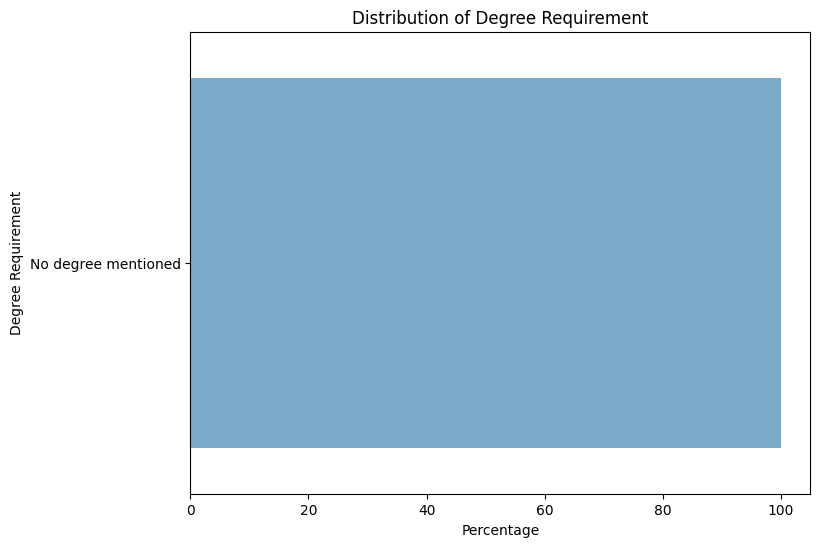

In [10]:
# Calculate the percentage distribution of degree_requirement
degree_requirement_percentage = df['degree_requirement'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=degree_requirement_percentage.values, y=degree_requirement_percentage.index, palette="Blues_r")
plt.xlabel('Percentage')
plt.ylabel('Degree Requirement')
plt.title('Distribution of Degree Requirement')
plt.show()

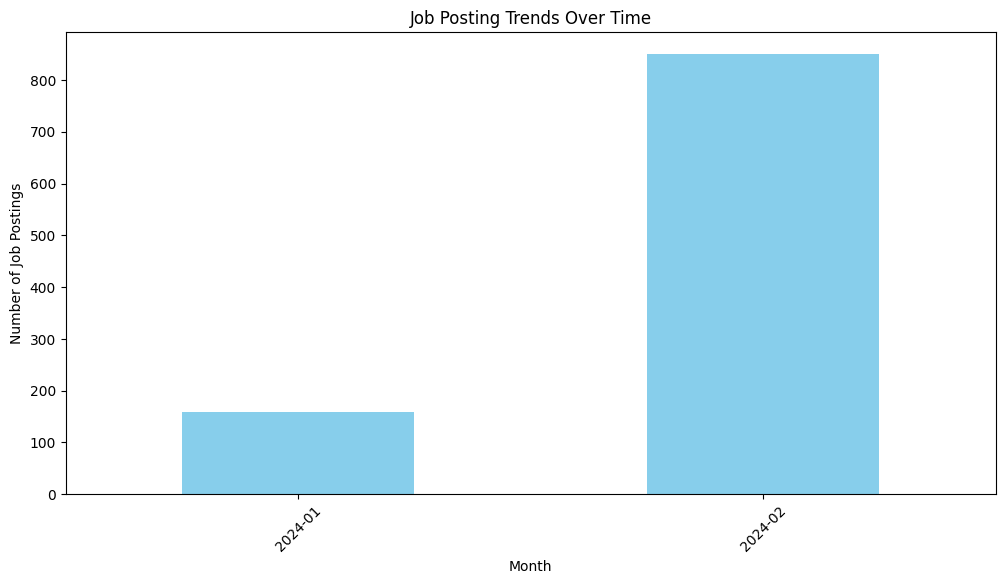

In [11]:
# Trend Analysis Based on Posting Dates
df['posting_month'] = df['posted_at_timestamp'].dt.to_period('M')
posting_trend = df.groupby('posting_month').size()

plt.figure(figsize=(12, 6))
posting_trend.plot(kind='bar', color='skyblue')
plt.title('Job Posting Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()